## Importing Necessary Libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor

## Loading the dataset 

In [2]:
df_original = pd.read_csv('/home/soumya/Documents/Win-Factor-Soumya/submissions/soumya_jhunjhunwala/week2/mw_pw_profiles.csv', low_memory = False)

In [3]:
df_original.columns

Index(['player_id', 'match_id', 'gender', 'balls_per_over', 'start_date',
       'series_name', 'match_type', 'name_x', 'runs_scored', 'player_out',
       'balls_faced', 'fours_scored', 'sixes_scored', 'catches_taken',
       'run_out_direct', 'run_out_throw', 'stumpings_done', 'out_kind',
       'dot_balls_as_batsman', 'order_seen', 'balls_bowled', 'runs_conceded',
       'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_score_bowling',


## Dropping Unnecessary columns :

In [4]:
df_original.drop(['gender', 'balls_per_over', 'series_name', 'name_x', 'name_y', 'unique_name','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams', ], axis = 1, inplace = True)

In [5]:
df_original.columns

Index(['player_id', 'match_id', 'start_date', 'match_type', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team',
       'fantasy_score_batting', 'fantasy_score_bowling',
       'fantasy_score_total'],
      dtype='object')

In [6]:
df_original.head()

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,00015688,1158348,2018-08-21,T20,10,1,30,1,0,1,...,0,0,0,0,0,Sierra Leone,Namibia,5,8,17
1,00015688,1182644,2019-05-05,T20,8,1,18,1,0,0,...,0,0,0,0,0,Sierra Leone,Uganda,3,0,7
2,00015688,1275107,2021-09-09,T20,1,0,5,0,0,0,...,0,0,0,0,0,Sierra Leone,Nigeria,1,0,5
3,00015688,1275113,2021-09-15,T20,0,0,0,0,0,0,...,0,0,0,0,0,Sierra Leone,Cameroon,0,0,4
4,00015688,1275125,2021-09-14,T20,1,1,15,0,0,0,...,0,0,0,0,0,Sierra Leone,Uganda,-5,0,-1


## Checking for null values

In [7]:
df_original.isnull().sum()

player_id                0
match_id                 0
start_date               0
match_type               0
runs_scored              0
player_out               0
balls_faced              0
fours_scored             0
sixes_scored             0
catches_taken            0
run_out_direct           0
run_out_throw            0
stumpings_done           0
out_kind                 0
dot_balls_as_batsman     0
order_seen               0
balls_bowled             0
runs_conceded            0
wickets_taken            0
bowled_done              0
lbw_done                 0
maidens                  0
dot_balls_as_bowler      0
player_team              0
opposition_team          0
fantasy_score_batting    0
fantasy_score_bowling    0
fantasy_score_total      0
dtype: int64

## Sorting the dataset according to start_date

In [8]:
df_original['start_date'] = pd.to_datetime(df_original['start_date'], errors='coerce')

df_original.sort_values(by=['start_date'], inplace=True)
df_original.reset_index(drop=True, inplace=True)

In [9]:
df_original.head()

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,f44af07f,63963,2001-12-19,Test,39,1,93,6,0,0,...,0,0,0,2,39,England,India,45,0,49
1,de8cce37,63963,2001-12-19,Test,12,1,18,2,0,1,...,0,0,0,0,0,India,England,14,8,26
2,b6cd714f,63963,2001-12-19,Test,4,1,16,0,0,0,...,4,0,1,5,96,India,England,4,76,84
3,725529bc,63963,2001-12-19,Test,0,1,3,0,0,0,...,0,0,0,3,70,India,England,-4,0,0
4,0184dc35,63963,2001-12-19,Test,3,1,61,0,0,1,...,0,0,0,0,0,India,England,3,14,21


In [10]:
df_original.tail()

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
416707,4e38a3d6,1485778,2025-05-20,T20,4,1,10,0,0,0,...,0,0,0,0,0,Nepal,Thailand,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,8,Thailand,Nepal,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,0,0,0,0,0,1,...,0,0,0,0,10,Thailand,Nepal,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,6,Chennai Super Kings,Rajasthan Royals,0,-4,0
416711,97e6e41a,1485778,2025-05-20,T20,24,0,33,1,0,0,...,0,0,0,0,10,Nepal,Thailand,25,0,29


## Feature Engineering

In [11]:
df_features = df_original.copy()

In [12]:
label_encoder = preprocessing.LabelEncoder()
df_features['player_id']= label_encoder.fit_transform(df_features['player_id'])
df_features['player_team']= label_encoder.fit_transform(df_features['opposition_team'])

In [13]:
df_features.drop(['match_id'], inplace=True, axis=1)

In [14]:
df_features.drop(['out_kind'],inplace = True, axis = 1)

In [15]:
df_features = pd.get_dummies(df_features, columns = ['match_type'], drop_first = True, dtype = int)

In [16]:
df_features['strike_rate'] = (df_features['runs_scored'] / df_features['balls_faced'])*100

In [17]:
df_features['economy_rate'] = (df_features['runs_conceded'] / df_features['balls_bowled'])*100

In [18]:
df_features.drop(['balls_faced', 'runs_conceded', 'balls_bowled', 'player_out', 'dot_balls_as_batsman', 'dot_balls_as_bowler', 'fantasy_score_batting', 'fantasy_score_bowling'], inplace = True, axis = 1)

In [19]:
df_features['match_id'] = df_original['match_id']

In [20]:
df_features.columns

Index(['player_id', 'start_date', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'match_id'],
      dtype='object')

In [21]:
df_features.drop(['order_seen'], inplace = True, axis = 1)

### Exponential Moving Average 

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average.

​$$\text{EMA}_t = \alpha \cdot x_t + (1 - \alpha) \cdot \text{EMA}_{t-1}$$

$$\alpha = \frac{2}{N + 1}$$


Where : 

${EMA}_t$ : EMA at step t

${x}_t$ : actual value at time t

$\alpha$ : smoothing factor

N : window span 

In [22]:
df_features['runs_scored_1'] = df_features['runs_scored'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['runs_scored_5'] = df_features['runs_scored'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['runs_scored_10'] = df_features['runs_scored'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['fours_scored_1'] = df_features['fours_scored'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['fours_scored_5'] = df_features['fours_scored'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['fours_scored_10'] = df_features['fours_scored'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['sixes_scored_1'] = df_features['sixes_scored'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['sixes_scored_5'] = df_features['sixes_scored'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['sixes_scored_10'] = df_features['sixes_scored'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['catches_taken_1'] = df_features['catches_taken'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['catches_taken_5'] = df_features['catches_taken'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['catches_taken_10'] = df_features['catches_taken'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['run_out_direct_1'] = df_features['run_out_direct'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['run_out_direct_5'] = df_features['run_out_direct'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['run_out_direct_10'] = df_features['run_out_direct'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['run_out_throw_1'] = df_features['run_out_throw'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['run_out_throw_5'] = df_features['run_out_throw'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['run_out_throw_10'] = df_features['run_out_throw'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['stumpings_done_1'] = df_features['stumpings_done'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['stumpings_done_5'] = df_features['stumpings_done'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['stumpings_done_10'] = df_features['stumpings_done'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['wickets_taken_1'] = df_features['wickets_taken'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['wickets_taken_5'] = df_features['wickets_taken'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['wickets_taken_10'] = df_features['wickets_taken'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['bowled_done_1'] = df_features['bowled_done'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['bowled_done_5'] = df_features['bowled_done'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['bowled_done_10'] = df_features['bowled_done'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['lbw_done_1'] = df_features['lbw_done'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['lbw_done_5'] = df_features['lbw_done'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['lbw_done_10'] = df_features['lbw_done'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['maidens_1'] = df_features['maidens'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['maidens_5'] = df_features['maidens'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['maidens_10'] = df_features['maidens'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['strike_rate_1'] = df_features['strike_rate'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['strike_rate_5'] = df_features['strike_rate'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['strike_rate_10'] = df_features['strike_rate'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['economy_rate_1'] = df_features['economy_rate'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['economy_rate_5'] = df_features['economy_rate'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['economy_rate_10'] = df_features['economy_rate'].shift(-1).ewm(span=10, adjust=False).mean()


In [23]:
df_features.drop(['player_team', 'opposition_team'], inplace=True, axis=1)

In [24]:
df_original['order_seen'].dtype

dtype('int64')

In [25]:
df_original['order_seen'].unique()

array([ 7,  0,  8,  1,  4, 10,  5, 11,  2,  3,  6,  9, 12])

In [26]:
df_features['order_seen'] = df_original['order_seen']

In [27]:
df_features.shape

(416712, 62)

In [28]:
df_features.sort_values(by=['start_date'], inplace=True)
df_features.reset_index(drop=True, inplace=True)

In [29]:
df_features.fillna(0, inplace=True)

In [30]:
df_features.drop(['runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens', 'strike_rate', 'economy_rate'], inplace=True, axis = 1)

## Splitting the dataset into training and testing

In [31]:
df_features['start_date'] = pd.to_datetime(df_features['start_date'])

cutoff_date = pd.to_datetime('2024-07-01')

train_df_features = df_features[df_features['start_date'] < cutoff_date]
test_df_features = df_features[df_features['start_date'] >= cutoff_date]

In [32]:
train_df_features

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
0,11182,2001-12-19,49,0,0,0,0,1,63963,12.0,...,0.0,0.000000,0.000000,66.666667,66.666667,66.666667,0.000000,0.000000,0.000000,7
1,1878,2001-12-19,44,0,0,0,0,1,63963,28.0,...,18.0,7.263168,4.666414,35.000000,31.255504,33.429867,38.235294,39.408064,44.769324,0
2,10153,2001-12-19,84,0,0,0,0,1,63963,28.0,...,0.0,1.894752,1.703394,26.666667,29.383256,33.080949,31.176471,40.287642,46.543999,6
3,11344,2001-12-19,62,0,0,0,0,1,63963,0.0,...,8.0,2.842127,2.081926,0.000000,30.741551,34.506345,31.176471,40.287642,46.543999,3
4,10707,2001-12-19,38,0,0,0,0,1,63963,43.0,...,0.0,0.263191,0.766799,67.187500,46.112327,42.174421,16.666667,55.662744,52.779079,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373275,1940,2024-06-30,8,0,0,1,0,0,1427830,2.0,...,0.0,1.149525,1.452277,20.000000,64.986173,72.976430,47.674419,66.164651,69.581351,0
373276,9214,2024-06-30,185,1,0,0,0,0,1410296,7.0,...,0.0,1.724288,1.775006,87.500000,87.479259,84.748970,47.674419,66.164651,69.581351,4
373277,2258,2024-06-30,60,1,0,0,0,0,1410236,0.0,...,0.0,0.671511,0.948323,58.333333,58.490680,63.974704,83.673469,80.023423,74.899302,0
373278,470,2024-06-30,2,1,0,0,0,0,1410295,35.0,...,10.0,3.879647,2.651552,97.222222,88.173031,83.710303,47.674419,66.164651,69.581351,1


In [33]:
train_df_features.tail()

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
373275,1940,2024-06-30,8,0,0,1,0,0,1427830,2.0,...,0.0,1.149525,1.452277,20.000000,64.986173,72.976430,47.674419,66.164651,69.581351,0
373276,9214,2024-06-30,185,1,0,0,0,0,1410296,7.0,...,0.0,1.724288,1.775006,87.500000,87.479259,84.748970,47.674419,66.164651,69.581351,4
373277,2258,2024-06-30,60,1,0,0,0,0,1410236,0.0,...,0.0,0.671511,0.948323,58.333333,58.490680,63.974704,83.673469,80.023423,74.899302,0
373278,470,2024-06-30,2,1,0,0,0,0,1410295,35.0,...,10.0,3.879647,2.651552,97.222222,88.173031,83.710303,47.674419,66.164651,69.581351,1
373279,10676,2024-06-30,129,1,0,0,0,0,1410236,142.0,...,0.0,2.586432,2.169452,86.060606,87.468889,84.137631,47.674419,66.164651,69.581351,0


In [34]:
test_df_features.head()

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
373280,7637,2024-07-01,-2,0,0,0,1,0,1428459,2.0,...,0.0,0.000044,0.008856,40.000000,73.495796,78.486920,66.666667,146.251129,140.847857,0
373281,394,2024-07-01,37,0,0,0,1,0,1428459,0.0,...,0.0,0.000003,0.002174,135.000000,124.857347,108.140107,160.000000,146.575036,145.853933,0
373282,6283,2024-07-01,66,0,0,0,1,0,1428459,27.0,...,0.0,0.000004,0.002657,135.000000,124.857347,108.140107,133.333333,139.862553,142.710362,0
373283,8563,2024-07-01,17,0,0,0,1,0,1428459,37.0,...,0.0,0.000006,0.003247,185.000000,119.786020,102.171242,176.666667,156.389642,147.360368,3
373284,6103,2024-07-01,27,0,0,0,1,0,1428459,6.0,...,0.0,0.000020,0.005928,46.153846,61.777818,71.580827,176.666667,156.389642,147.360368,0


In [35]:
test_df_features.tail()

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
416707,1587,2025-05-20,42,0,0,1,0,0,1462374,59.0,...,1.0,0.377848,0.260951,88.059701,109.071925,108.692056,91.666667,99.700640,105.694318,2
416708,7111,2025-05-20,96,0,0,1,0,0,1462374,38.0,...,0.0,0.066773,0.096717,66.666667,119.578036,113.277023,91.935484,105.726120,109.504298,7
416709,10032,2025-05-20,13,0,0,1,0,0,1462374,48.0,...,0.0,0.100159,0.118210,171.428571,146.033721,123.634881,91.935484,105.726120,109.504298,8
416710,10220,2025-05-20,16,0,0,0,1,0,1473500,0.0,...,0.0,0.074637,0.116939,125.000000,131.117036,121.959953,89.285714,95.902567,102.279715,2
416711,6957,2025-05-20,29,0,0,0,1,0,1485778,24.0,...,0.0,0.000009,0.001011,72.727273,64.876989,72.049387,125.000000,131.928193,131.999195,0


In [36]:
X_train = train_df_features.drop(['fantasy_score_total', 'match_id', 'start_date'], axis = 1)
y_train = train_df_features['fantasy_score_total']

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373280 entries, 0 to 373279
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   player_id          373280 non-null  int64  
 1   match_type_MDM     373280 non-null  int64  
 2   match_type_ODI     373280 non-null  int64  
 3   match_type_ODM     373280 non-null  int64  
 4   match_type_T20     373280 non-null  int64  
 5   match_type_Test    373280 non-null  int64  
 6   runs_scored_1      373280 non-null  float64
 7   runs_scored_5      373280 non-null  float64
 8   runs_scored_10     373280 non-null  float64
 9   fours_scored_1     373280 non-null  float64
 10  fours_scored_5     373280 non-null  float64
 11  fours_scored_10    373280 non-null  float64
 12  sixes_scored_1     373280 non-null  float64
 13  sixes_scored_5     373280 non-null  float64
 14  sixes_scored_10    373280 non-null  float64
 15  catches_taken_1    373280 non-null  float64
 16  catches

## Applying XGBoost( Experiment 1)

In [38]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

In [39]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
X_test = test_df_features.drop(['fantasy_score_total', 'match_id', 'start_date'], axis = 1)
y_test = test_df_features['fantasy_score_total']

In [41]:
fantasy_score_total_predicted = model.predict(X_test)

In [42]:
print("RMSE:", mean_squared_error(y_test, fantasy_score_total_predicted))
print("R² Score:", r2_score(y_test, fantasy_score_total_predicted))

RMSE: 460.0340270996094
R² Score: 0.7355293035507202


## Checking the shap values for the features

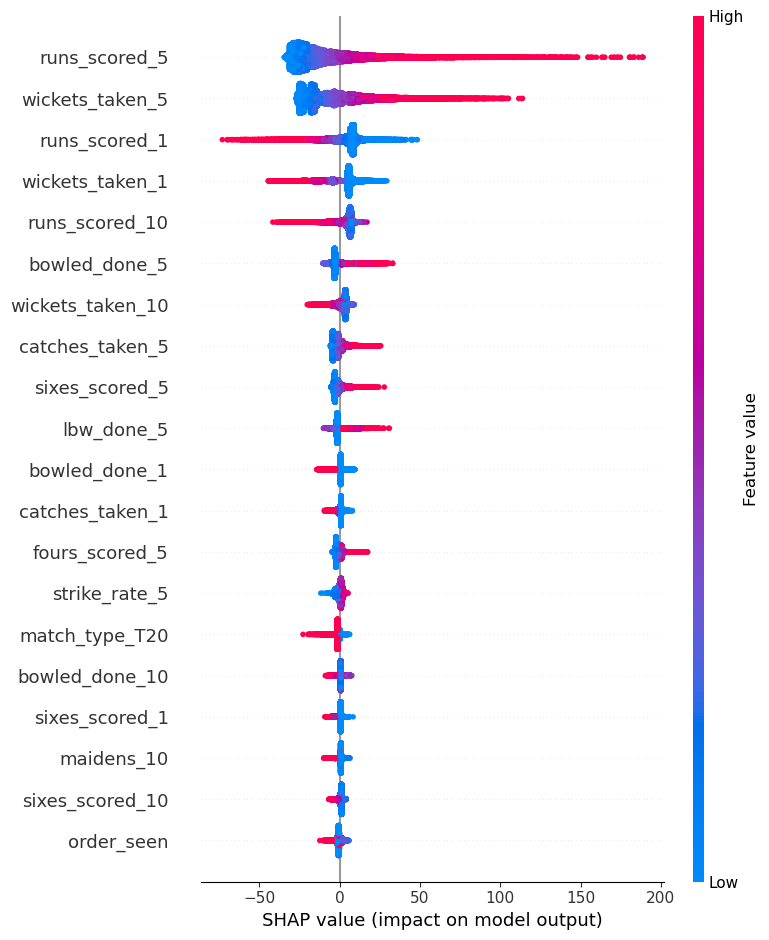

In [43]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
test_df_features['predicted_fantasy_score_total'] = fantasy_score_total_predicted

In [45]:
test_df_features

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen,predicted_fantasy_score_total
373280,7637,2024-07-01,-2,0,0,0,1,0,1428459,2.0,...,0.000044,0.008856,40.000000,73.495796,78.486920,66.666667,146.251129,140.847857,0,21.903391
373281,394,2024-07-01,37,0,0,0,1,0,1428459,0.0,...,0.000003,0.002174,135.000000,124.857347,108.140107,160.000000,146.575036,145.853933,0,37.924435
373282,6283,2024-07-01,66,0,0,0,1,0,1428459,27.0,...,0.000004,0.002657,135.000000,124.857347,108.140107,133.333333,139.862553,142.710362,0,35.787861
373283,8563,2024-07-01,17,0,0,0,1,0,1428459,37.0,...,0.000006,0.003247,185.000000,119.786020,102.171242,176.666667,156.389642,147.360368,3,23.971205
373284,6103,2024-07-01,27,0,0,0,1,0,1428459,6.0,...,0.000020,0.005928,46.153846,61.777818,71.580827,176.666667,156.389642,147.360368,0,19.545542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,2025-05-20,42,0,0,1,0,0,1462374,59.0,...,0.377848,0.260951,88.059701,109.071925,108.692056,91.666667,99.700640,105.694318,2,60.128098
416708,7111,2025-05-20,96,0,0,1,0,0,1462374,38.0,...,0.066773,0.096717,66.666667,119.578036,113.277023,91.935484,105.726120,109.504298,7,57.453739
416709,10032,2025-05-20,13,0,0,1,0,0,1462374,48.0,...,0.100159,0.118210,171.428571,146.033721,123.634881,91.935484,105.726120,109.504298,8,44.792171
416710,10220,2025-05-20,16,0,0,0,1,0,1473500,0.0,...,0.074637,0.116939,125.000000,131.117036,121.959953,89.285714,95.902567,102.279715,2,49.981537


## Evaluation

In [ ]:
evaluation_df = (

    test_df_features.groupby('match_id').apply(

        lambda x: pd.Series({

            'actual_top_11_sum' : x['fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum' : x['predicted_fantasy_score_total'].nlargest(10).sum()

        })

    ).reset_index()

)

In [47]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum
0,1385691,1081.0,1098.525635
1,1385692,1722.0,1484.441528
2,1385693,1304.0,1233.989258
3,1385694,1497.0,1196.484375
4,1385695,1585.0,1433.572632
...,...,...,...
1960,1484052,725.0,628.358887
1961,1485778,629.0,586.093018
1962,1486225,799.0,659.306580
1963,1486227,671.0,594.785828


In [48]:
evaluation_df['absolute_percentage_error'] = (
    (evaluation_df['predicted_top_11_sum'] - evaluation_df['actual_top_11_sum']).abs() /
    evaluation_df['actual_top_11_sum']
) * 100


In [49]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum,absolute_percentage_error
0,1385691,1081.0,1098.525635,1.621243
1,1385692,1722.0,1484.441528,13.795498
2,1385693,1304.0,1233.989258,5.368922
3,1385694,1497.0,1196.484375,20.074524
4,1385695,1585.0,1433.572632,9.553777
...,...,...,...,...
1960,1484052,725.0,628.358887,13.329809
1961,1485778,629.0,586.093018,6.821460
1962,1486225,799.0,659.306580,17.483532
1963,1486227,671.0,594.785828,11.358297


In [50]:
mean_absolute_percentage_error = evaluation_df['absolute_percentage_error'].mean()

In [51]:
print(f"Mean absolute percentage error across all matches : {mean_absolute_percentage_error}" )

Mean absolute percentage error across all matches : 13.241476358622556


In [52]:
evaluation_df['percentage_error'] = (
        (evaluation_df['predicted_top_11_sum'] - evaluation_df['actual_top_11_sum']) /
    evaluation_df['actual_top_11_sum']
) * 100


In [53]:
mean_percentage_error = evaluation_df['percentage_error'].mean()

In [54]:
print(f"Mean percentage error across all matches : {mean_percentage_error}" )

Mean percentage error across all matches : -8.628264155017764


In [55]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum,absolute_percentage_error,percentage_error
0,1385691,1081.0,1098.525635,1.621243,1.621243
1,1385692,1722.0,1484.441528,13.795498,-13.795498
2,1385693,1304.0,1233.989258,5.368922,-5.368922
3,1385694,1497.0,1196.484375,20.074524,-20.074524
4,1385695,1585.0,1433.572632,9.553777,-9.553777
...,...,...,...,...,...
1960,1484052,725.0,628.358887,13.329809,-13.329809
1961,1485778,629.0,586.093018,6.821460,-6.821460
1962,1486225,799.0,659.306580,17.483532,-17.483532
1963,1486227,671.0,594.785828,11.358297,-11.358297


## Plotting actual_top_11_sum vs predicted_top_11_sum

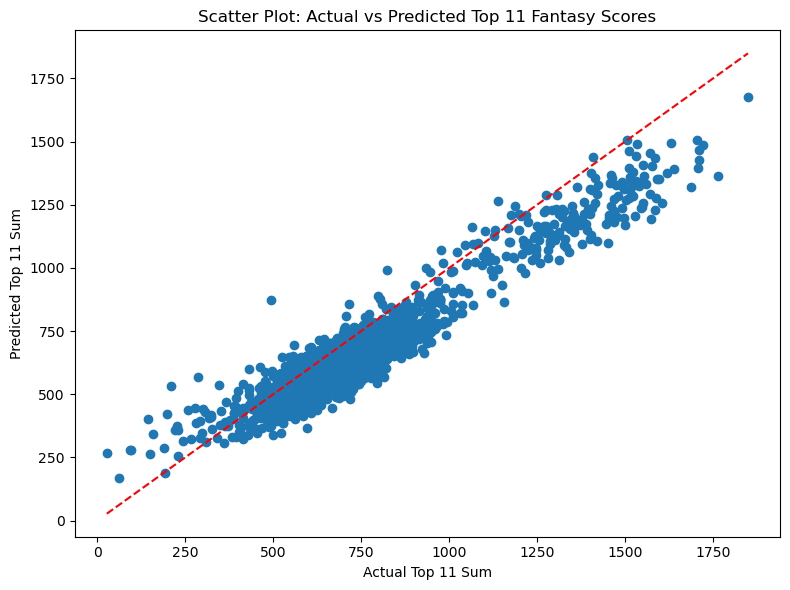

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(
    evaluation_df['actual_top_11_sum'],
    evaluation_df['predicted_top_11_sum'],
)
plt.plot([evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         [evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Scatter Plot: Actual vs Predicted Top 11 Fantasy Scores')

plt.tight_layout()
plt.show()


## Applying PCA for visualization :

In [57]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [58]:
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train_scaled)

In [59]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.20197769 0.11698539]


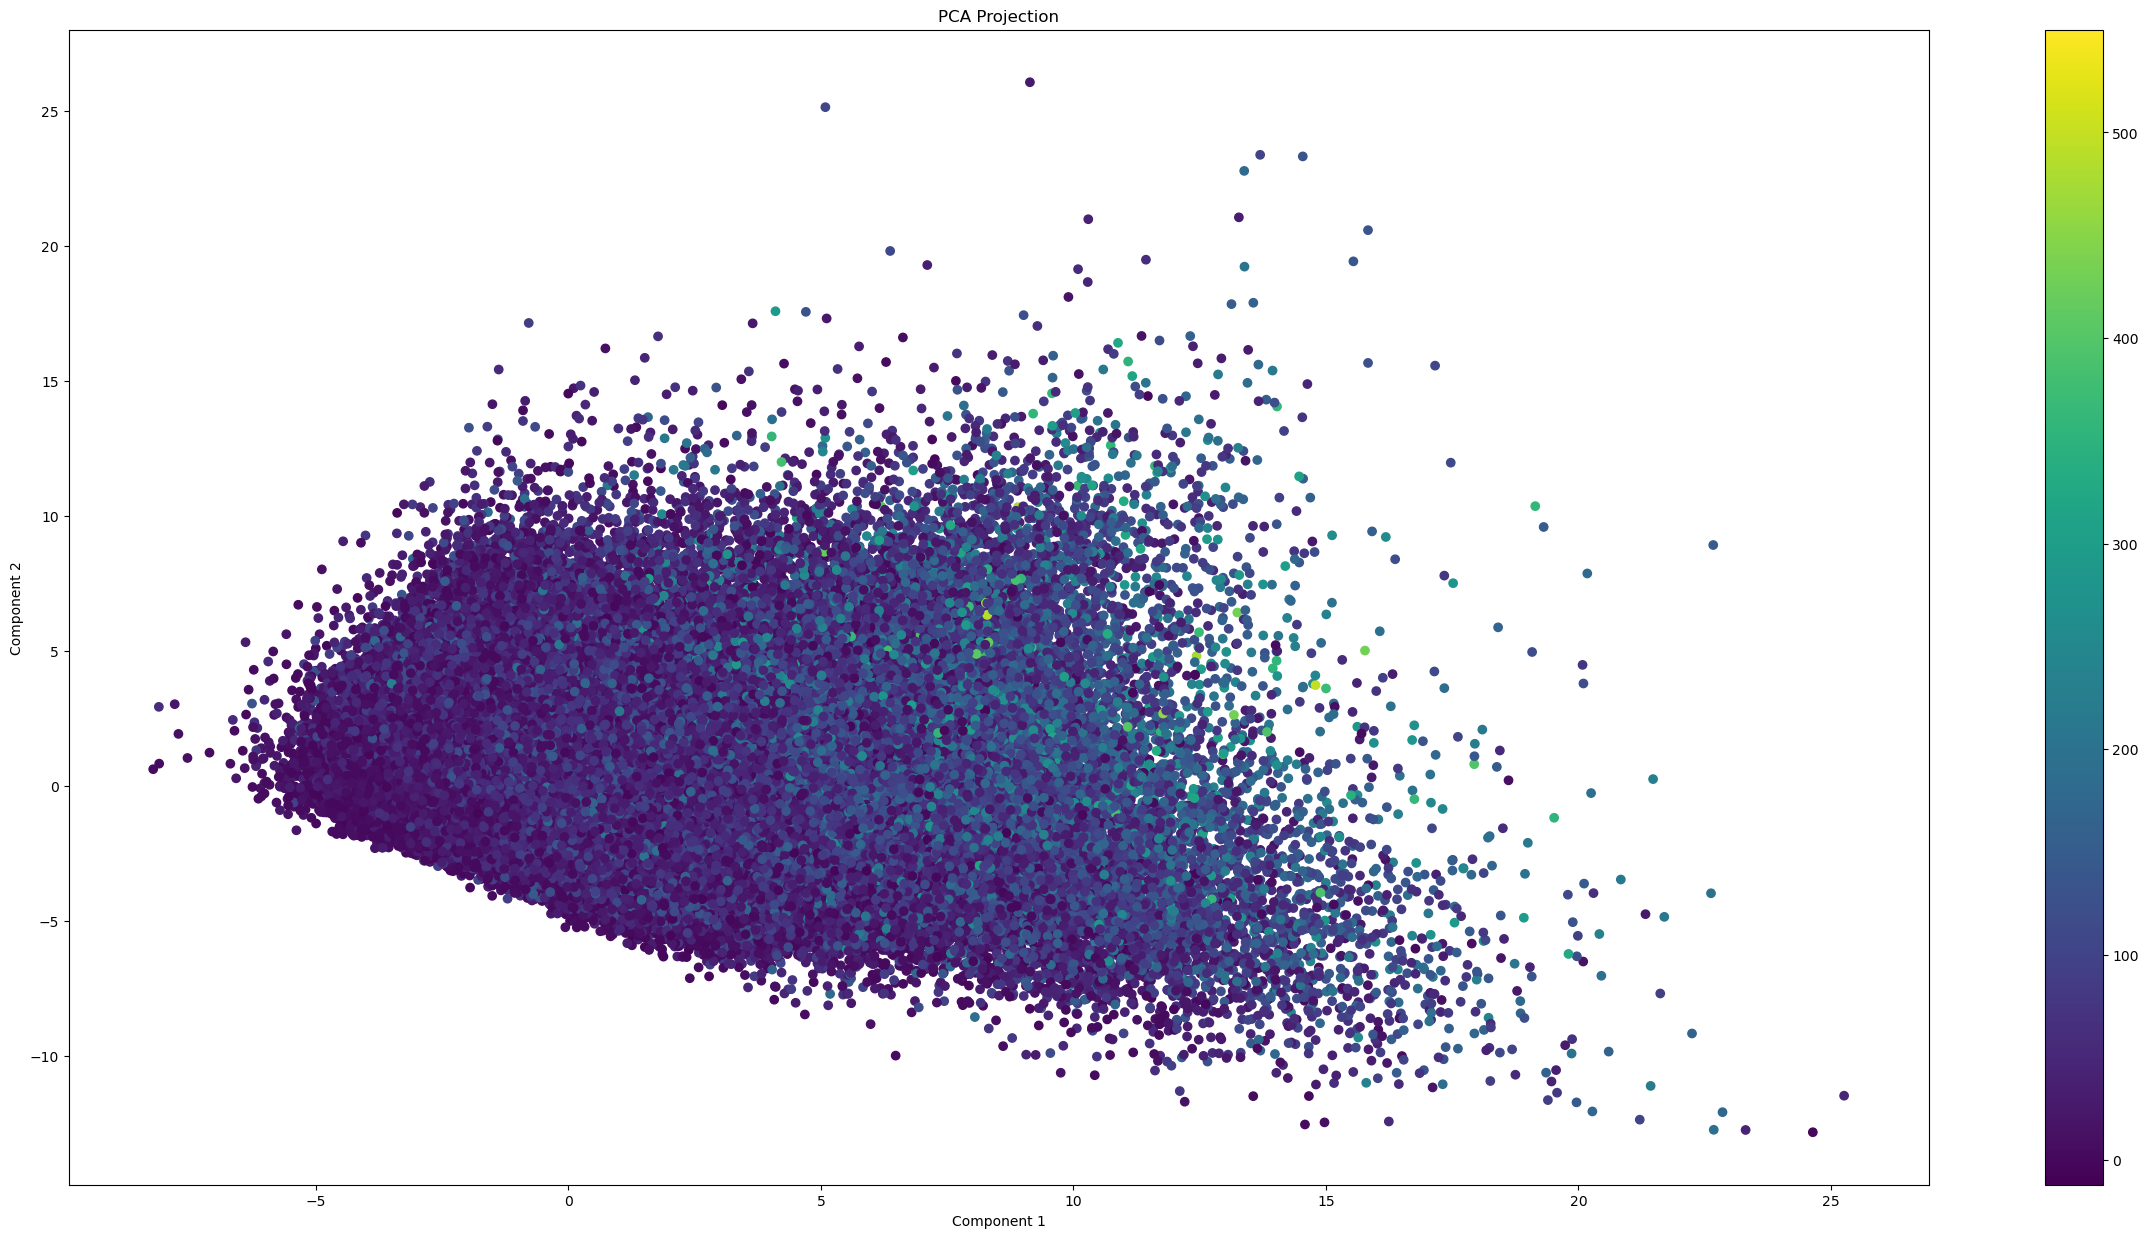

In [60]:
plt.figure(figsize=(30, 15))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c= y_train)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Projection')
plt.colorbar()
plt.show()


## Applying PCA for Modelling (Experiment 2):

In [61]:
pca = PCA(n_components=0.95)
X_train_transformed = pca.fit_transform(X_train_scaled)

In [62]:
print("Number of components:", pca.n_components_)

Number of components: 24


In [63]:
model2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

In [64]:
model2.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [65]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_transformed = pca.transform(X_test_scaled)
fantasy_score_total_predicted2 = model2.predict(X_test_transformed)

In [66]:
print("RMSE:", mean_squared_error(y_test, fantasy_score_total_predicted2))
print("R² Score:", r2_score(y_test, fantasy_score_total_predicted2))

RMSE: 1001.6814575195312
R² Score: 0.4241396188735962


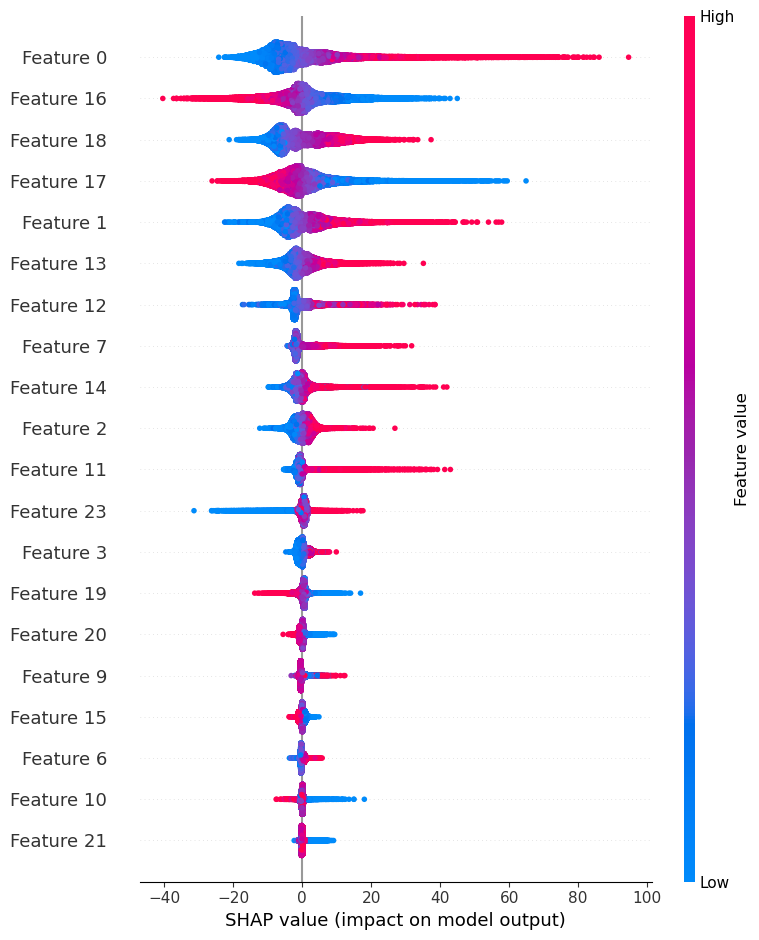

In [67]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed)

In [ ]:
test_df_features['predicted_fantasy_score_total_exp2'] = fantasy_score_total_predicted2

In [84]:
evaluation_df = (

    test_df_features.groupby('match_id').apply(

        lambda x: pd.Series({

            'actual_top_11_sum' : x['fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp1' : x['predicted_fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp2' : x['predicted_fantasy_score_total_exp2'].nlargest(10).sum()

        })

    ).reset_index()

)

/tmp/ipykernel_78328/1164592780.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df_features.groupby('match_id').apply(


In [85]:
evaluation_df['absolute_percentage_error_exp2'] = (
    (evaluation_df['predicted_top_11_sum_exp2'] - evaluation_df['actual_top_11_sum']).abs() /
    evaluation_df['actual_top_11_sum']
) * 100

In [86]:
evaluation_df['percentage_error_exp2'] = (
        (evaluation_df['predicted_top_11_sum_exp2'] - evaluation_df['actual_top_11_sum']) /
    evaluation_df['actual_top_11_sum']
) * 100

In [87]:
mean_absolute_percentage_error = evaluation_df['absolute_percentage_error_exp2'].mean()

In [88]:
mean_percentage_error = evaluation_df['percentage_error_exp2'].mean()

In [94]:
print(f"Mean absolute percentage error across all matches : {mean_absolute_percentage_error}%" )

Mean absolute percentage error across all matches : 19.101072400090988%


In [95]:
print(f"percentage error across all matches : {mean_percentage_error}%" )

percentage error across all matches : -11.182351873322265%


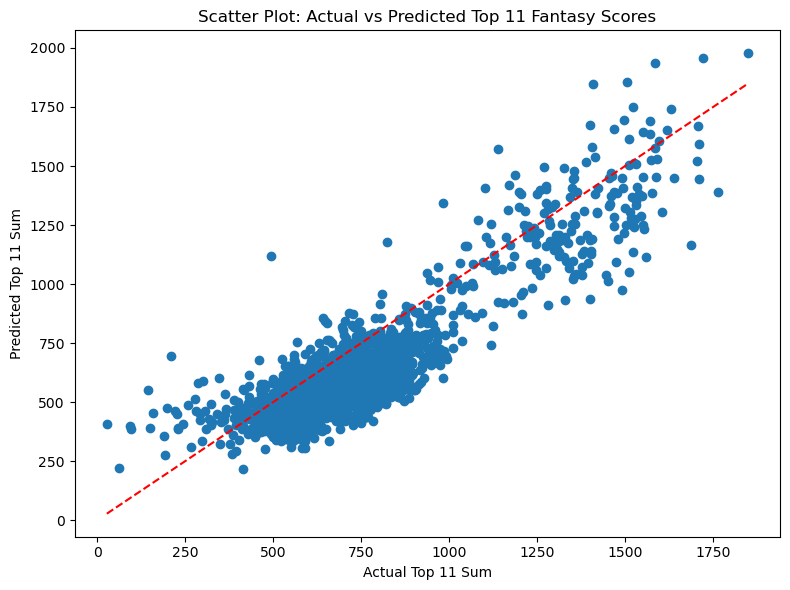

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(
    evaluation_df['actual_top_11_sum'],
    evaluation_df['predicted_top_11_sum_exp2'],
)
plt.plot([evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         [evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Scatter Plot: Actual vs Predicted Top 11 Fantasy Scores')

plt.tight_layout()
plt.show()

## Applying RFECV for feature selection (Experiment 3): 

In [68]:
model3 = XGBRegressor(n_estimators=100, random_state=42)

In [ ]:
rfecv = RFECV(estimator=model3, step = 1, cv=5, scoring = 'neg_mean_squared_error', n_jobs = -1)
rfecv.fit(X_train_scaled, y_train)

In [74]:

print(f"Number of optimal features: {rfecv.n_features_}")
print("Selected features:", X_train.columns[rfecv.support_].tolist())

Number of optimal features: 43
Selected features: ['match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20', 'match_type_Test', 'runs_scored_1', 'runs_scored_5', 'runs_scored_10', 'fours_scored_1', 'fours_scored_5', 'fours_scored_10', 'sixes_scored_1', 'sixes_scored_5', 'sixes_scored_10', 'catches_taken_1', 'catches_taken_5', 'catches_taken_10', 'run_out_direct_1', 'run_out_direct_5', 'run_out_direct_10', 'run_out_throw_1', 'run_out_throw_5', 'stumpings_done_1', 'stumpings_done_5', 'wickets_taken_1', 'wickets_taken_5', 'wickets_taken_10', 'bowled_done_1', 'bowled_done_5', 'bowled_done_10', 'lbw_done_1', 'lbw_done_5', 'lbw_done_10', 'maidens_1', 'maidens_5', 'maidens_10', 'strike_rate_1', 'strike_rate_5', 'strike_rate_10', 'economy_rate_1', 'economy_rate_5', 'economy_rate_10', 'order_seen']


In [75]:
X_train_selected = rfecv.transform(X_train_scaled)
X_test_selected = rfecv.transform(X_test_scaled)

In [80]:
model3.fit(X_train_selected, y_train)
fantasy_score_total_predicted3 = model3.predict(X_test_selected)

In [81]:
print("RMSE:", mean_squared_error(y_test, fantasy_score_total_predicted3))
print("R² Score:", r2_score(y_test, fantasy_score_total_predicted3))

RMSE: 555.3262329101562
R² Score: 0.6807464361190796


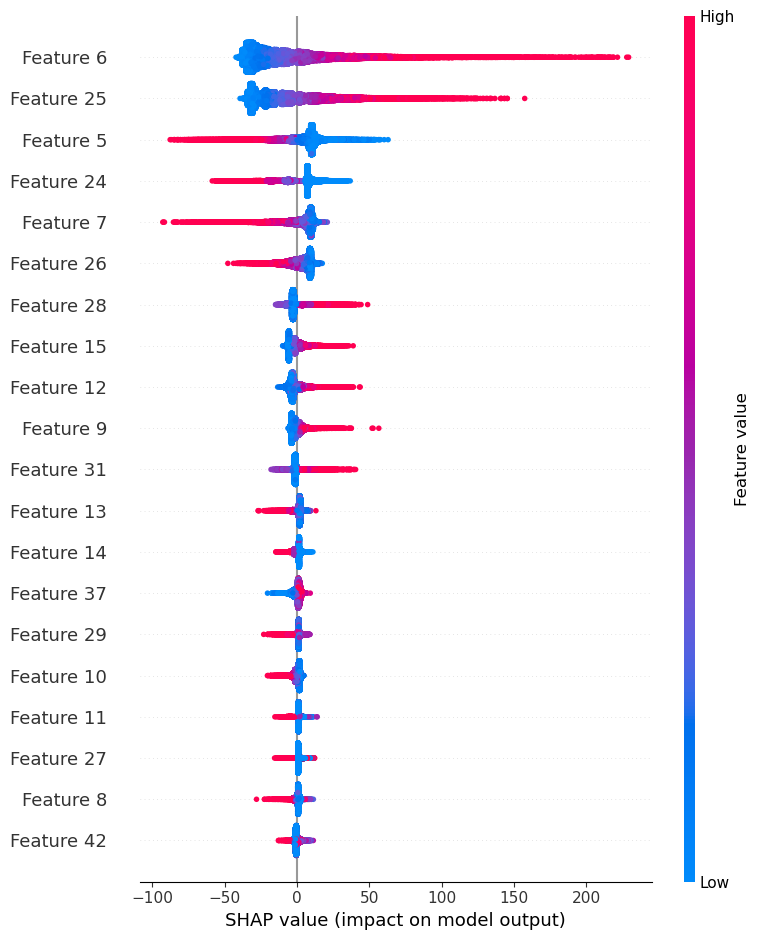

In [82]:
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_test_selected)
shap.summary_plot(shap_values, X_test_selected)

In [96]:
test_df_features['predicted_fantasy_score_total_exp3'] = fantasy_score_total_predicted3

/tmp/ipykernel_78328/3079590622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_features['predicted_fantasy_score_total_exp3'] = fantasy_score_total_predicted3


In [97]:
evaluation_df = (

    test_df_features.groupby('match_id').apply(

        lambda x: pd.Series({

            'actual_top_11_sum' : x['fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp1' : x['predicted_fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp2' : x['predicted_fantasy_score_total_exp2'].nlargest(10).sum(),
            'predicted_top_11_sum_exp3' : x['predicted_fantasy_score_total_exp3'].nlargest(10).sum()


        })

    ).reset_index()

)

/tmp/ipykernel_78328/2341787377.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df_features.groupby('match_id').apply(


In [99]:
evaluation_df['absolute_percentage_error_exp3'] = (
    (evaluation_df['predicted_top_11_sum_exp3'] - evaluation_df['actual_top_11_sum']).abs() /
    evaluation_df['actual_top_11_sum']
) * 100

In [100]:
evaluation_df['percentage_error_exp3'] = (
        (evaluation_df['predicted_top_11_sum_exp3'] - evaluation_df['actual_top_11_sum']) /
    evaluation_df['actual_top_11_sum']
)*100

In [101]:
mean_absolute_percentage_error = evaluation_df['absolute_percentage_error_exp3'].mean()

In [102]:
mean_percentage_error = evaluation_df['percentage_error_exp3'].mean()

In [103]:
print(f"Mean absolute percentage error across all matches : {mean_absolute_percentage_error}%" )

Mean absolute percentage error across all matches : 10.959094118846119%


In [104]:
print(f"percentage error across all matches : {mean_percentage_error}%" )

percentage error across all matches : 5.66123328220596%


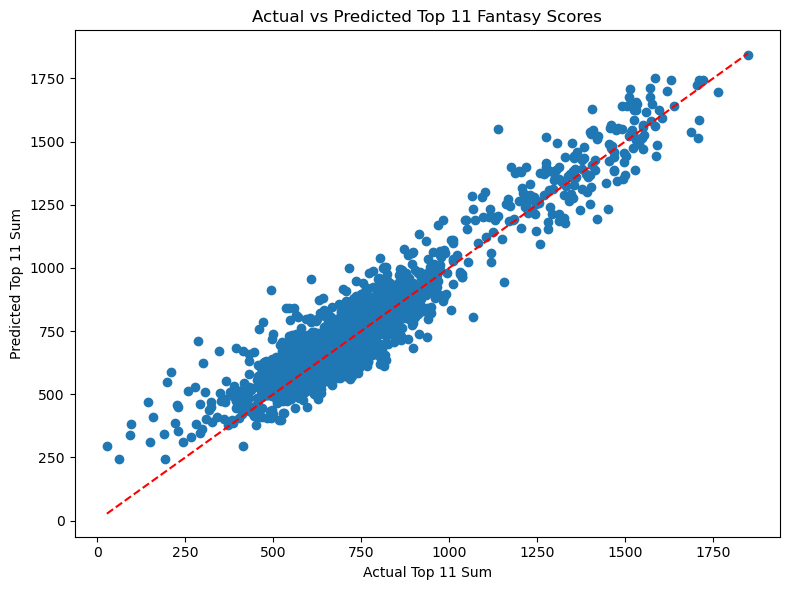

In [ ]:

plt.scatter(
    evaluation_df['actual_top_11_sum'],
    evaluation_df['predicted_top_11_sum_exp3'],
)
plt.plot([evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         [evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')

plt.tight_layout()
plt.show()